Let's set up an example scenario as perspective for our regression exercises using the Zillow dataset.

As a Codeup data science graduate, you want to show off your skills to the Zillow data science team in hopes of getting an interview for a position you saw pop up on LinkedIn. You thought it might look impressive to build an end-to-end project in which you use some of their Kaggle data to predict property values using some of their available features; who knows, you might even do some feature engineering to blow them away. Your goal is to predict the values of single unit properties using the obervations from 2017.

In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.

2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaningful; remember to document your process and decisions using markdown and code commenting where helpful.

3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe with no missing values in your wrangle.py file. Name your final function wrangle_zillow.

##### Imports

In [1]:
import pandas as pd
import numpy as np

from env import user, password, host

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings("ignore")

##### Aquire

In [2]:
# definition to connect to mySQL
def get_db_url(user, host,password, db):
    url = f'mysql+pymysql://{user}:{password}@{host}/{db}'
    return url

In [3]:
# variable to aquire dataset from mySQL
url = get_db_url(user, host, password, 'zillow')

In [4]:
# query to aquire data from zillow dataset
query = '''
SELECT bedroomcnt
, bathroomcnt
, calculatedfinishedsquarefeet
, taxvaluedollarcnt
, yearbuilt
, taxamount
, fips
FROM properties_2017
LEFT JOIN propertylandusetype USING(propertylandusetypeid)
WHERE propertylandusedesc IN ("Single Family Residential"
                                , "Inferred Single Family Residential")'''

In [5]:
# put it all together as df
df = pd.read_sql(query, url)

##### Summarize

In [6]:
# grab head of dataframe
# already see there are missing values in index 2, 4, and 5
# all columns should be numeric
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [7]:
# shape 
# 2152864 rows, 7 columns
df.shape

(2152864, 7)

In [8]:
# describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedroomcnt,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathroomcnt,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
calculatedfinishedsquarefeet,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
taxvaluedollarcnt,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
yearbuilt,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [9]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


##### Find null values

In [10]:
# total of null values in each row
df.isna().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

In [11]:
df.isnull().sum()

bedroomcnt                        11
bathroomcnt                       11
calculatedfinishedsquarefeet    8485
taxvaluedollarcnt                493
yearbuilt                       9338
taxamount                       4442
fips                               0
dtype: int64

Lots of null values

##### Clean

In [12]:
# rename columns
df = df.rename(columns= {'bedroomcnt': 'bedrooms'
                         , 'bathroomcnt': 'bathrooms'
                         , 'calculatedfinishedsquarefeet': 'sqr_ft'
                         , 'taxvaluedollarcnt': 'tax_value'
                         , 'yearbuilt': 'year_built'
                         , 'taxamount': 'tax_amount'})

In [13]:
# verify changes
df.head()

,bedrooms,bathrooms,sqr_ft,tax_value,year_built,tax_amount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [14]:
df.fips.value_counts()

6037.0    1431812
6059.0     555077
6111.0     165975
Name: fips, dtype: int64

In [15]:
df.year_built.value_counts()

1955.0    84405
1950.0    71693
1954.0    69163
1953.0    62342
1956.0    61942
          ...  
1823.0        1
1855.0        1
1879.0        1
1840.0        1
1874.0        1
Name: year_built, Length: 153, dtype: int64

In [16]:
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

In [17]:
cols

['bedrooms', 'bathrooms', 'sqr_ft', 'tax_value', 'tax_amount']

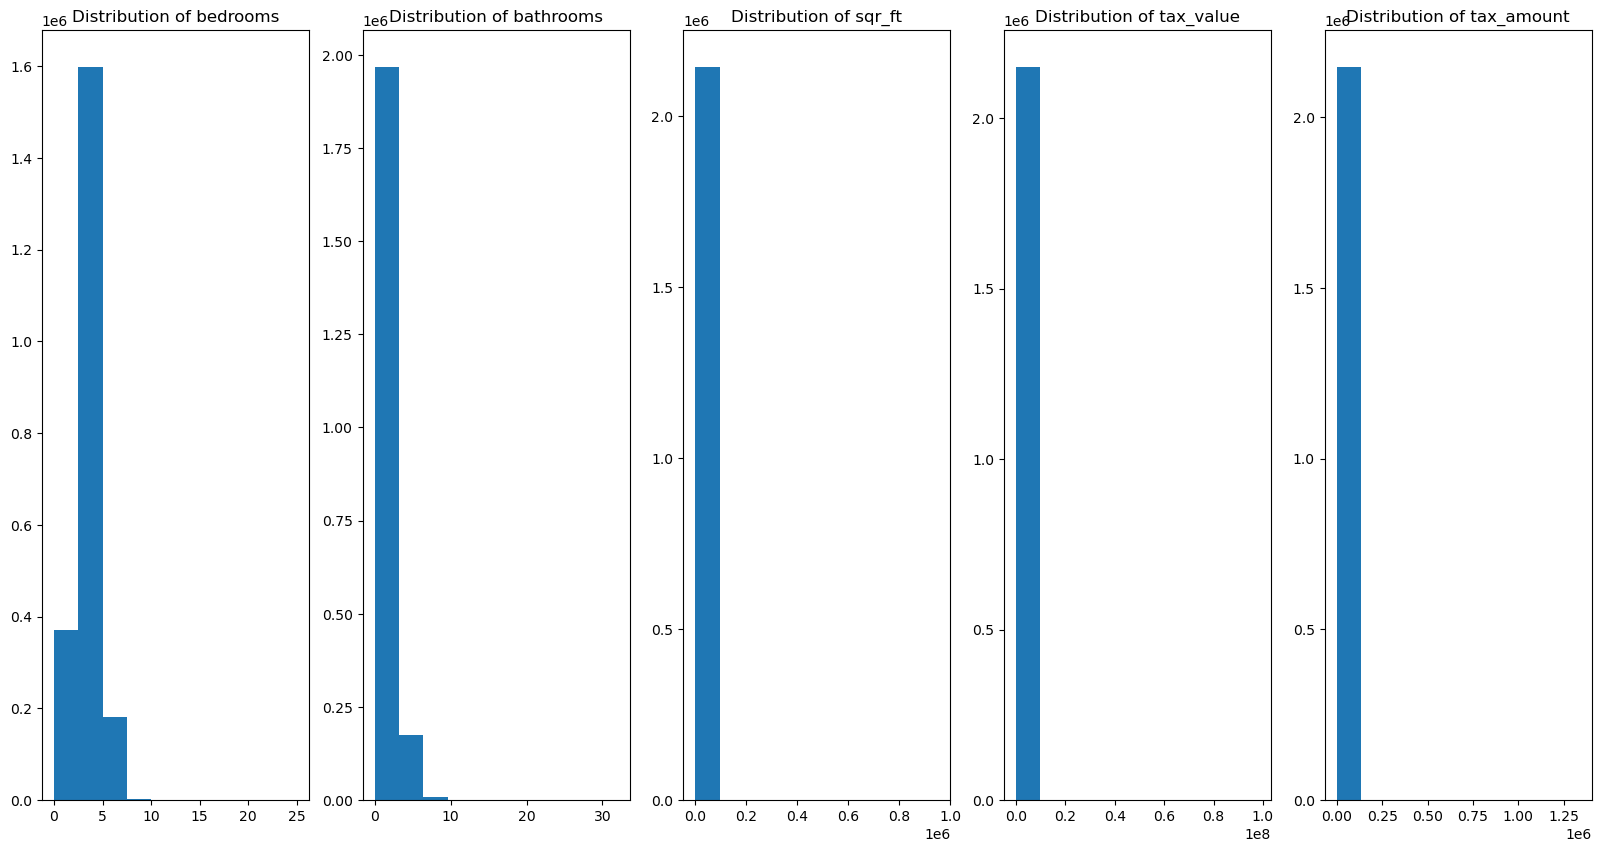

In [18]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

<AxesSubplot:>

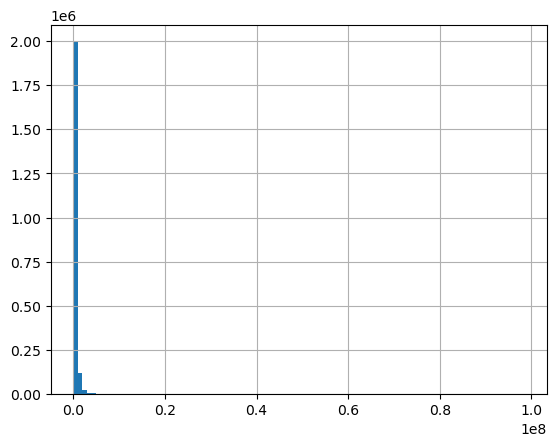

In [19]:
df['tax_value'].hist(bins=100)

<AxesSubplot:>

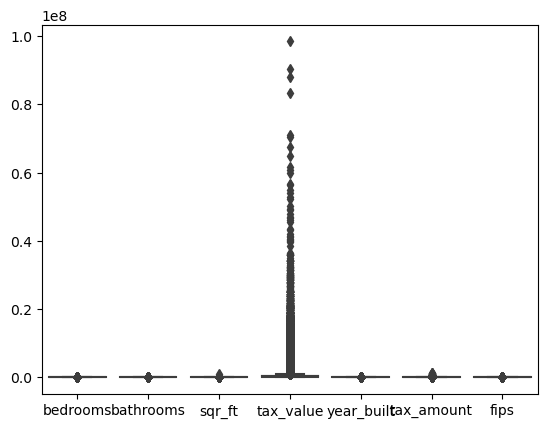

In [20]:
sns.boxplot(data=df)

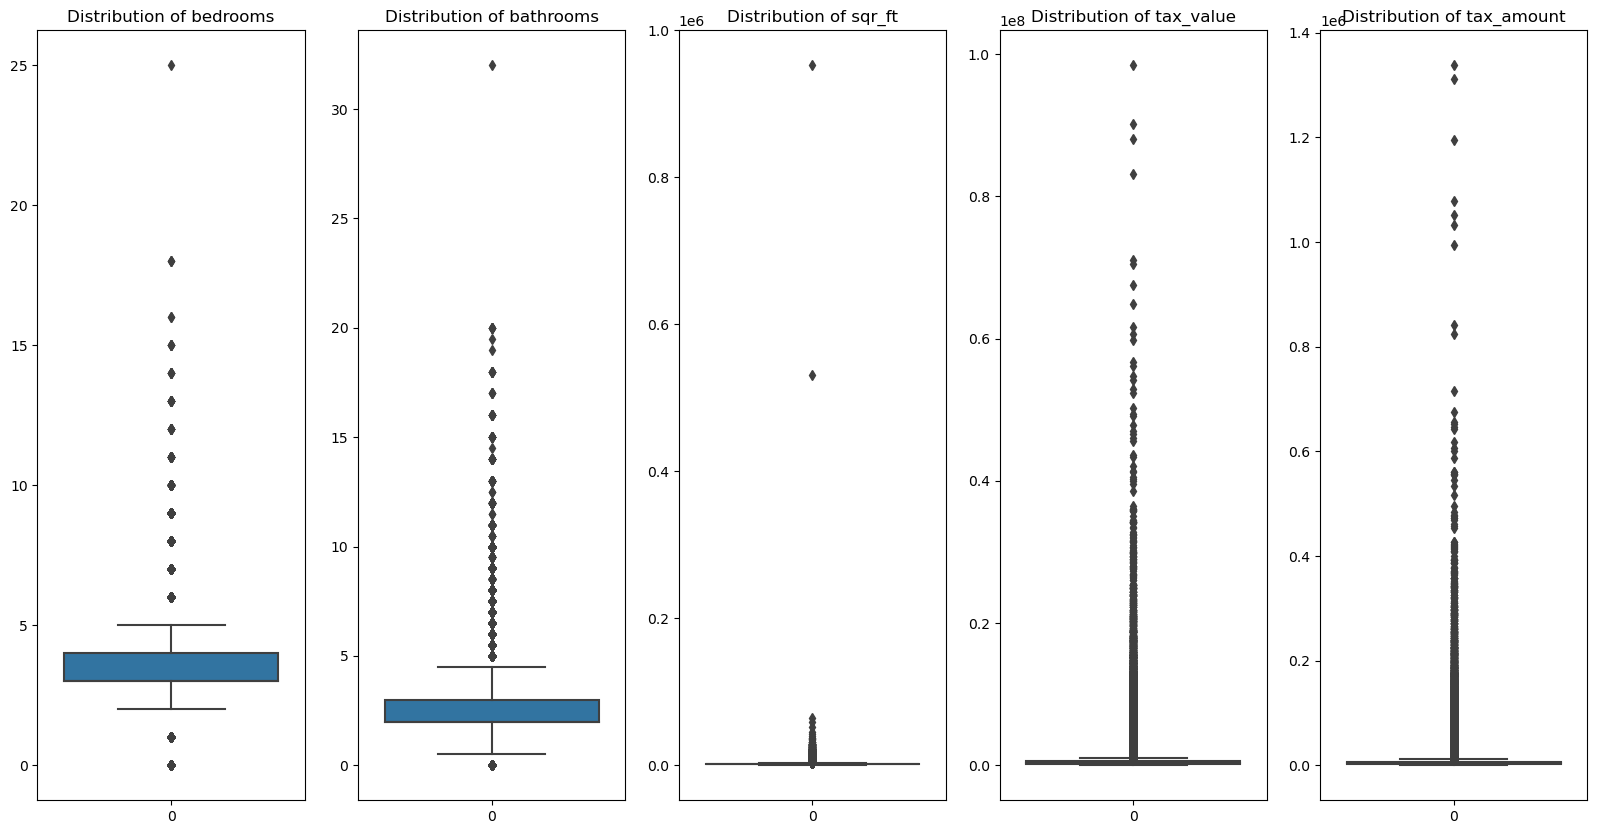

In [21]:
plt.figure(figsize=(20,10))
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    plt.grid(False)
    sns.boxplot(data=df[col])
plt.show()

##### Takeaways
    - tax value seems to have sever skew due to the x-axis range to 1e8

It seems outliers are highly dependent on properties with over 5+ bedrooms and bathrooms. Because of this I will focus on homes in the median range of values and the extremely high value properties will be analyzed at a later time.

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathrooms,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
sqr_ft,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
tax_value,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
tax_amount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [23]:
df['bathrooms'].describe()['25%']

2.0

In [24]:
df['bathrooms'].quantile(0.25)

2.0

In [25]:
# IQR for bathrooms:
iqr = df['bathrooms'].quantile(0.75) - df['bathrooms'].quantile(0.25)

In [26]:
lower_bathroom_fence = df['bathrooms'].quantile(0.25) - (1.5*iqr)

In [27]:
lower_bathroom_fence

0.5

In [28]:
upper_bathroom_fence = df['bathrooms'].quantile(0.75) + (1.5*iqr)

In [29]:
upper_bathroom_fence

4.5

In [30]:
df[(df.bathrooms > lower_bathroom_fence) & (df.bathrooms < upper_bathroom_fence)].bathrooms.describe()



count    2.065622e+06
mean     2.131432e+00
std      7.741102e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64

In [31]:
col_qs = {}
for col in cols:
    col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])

In [32]:
col_qs['bedrooms'][0.25]

3.0

In [33]:
def remove_outliers(df, col_list, k=1.5):
    col_qs = {}
    for col in col_list:
        col_qs[col] = q1, q3 = df[col].quantile([0.25, 0.75])
    for col in col_list:
        iqr = col_qs[col][0.75] - col_qs[col][0.25]
        lower_fence = col_qs[col][0.25] - (k*iqr)
        upper_fence = col_qs[col][0.75] + (k*iqr)
        print(type(lower_fence))
        print(lower_fence)
        df = df[(df[col] > lower_fence) & (df[col] < upper_fence)]
    return df

In [34]:
smol_df = remove_outliers(df, cols)

<class 'numpy.float64'>
1.5
<class 'numpy.float64'>
0.5
<class 'numpy.float64'>
-169.5
<class 'numpy.float64'>
-331365.5
<class 'numpy.float64'>
-3284.045


In [35]:
df.shape

(2152864, 7)

In [36]:
smol_df.shape

(1907777, 7)

In [37]:
df.shape[0] - smol_df.shape[0]

245087

In [38]:
round((df.shape[0] - smol_df.shape[0])/ df.shape[0] * 100, 2)

11.38

In [39]:
smol_df.isna().sum()

bedrooms        0
bathrooms       0
sqr_ft          0
tax_value       0
year_built    904
tax_amount      0
fips            0
dtype: int64

In [40]:
smol_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   sqr_ft      1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1906873 non-null  float64
 5   tax_amount  1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB


##### Revisualize Distributions

In [41]:
df = smol_df

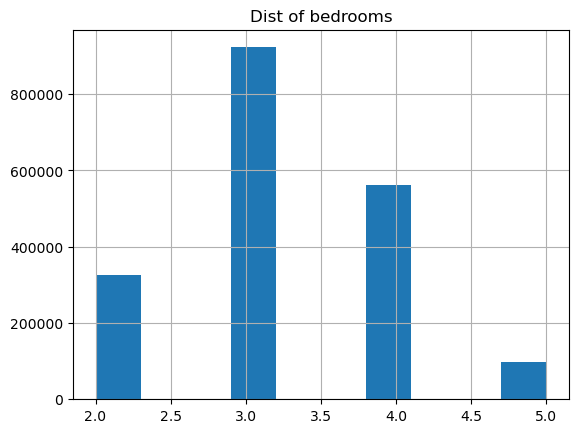

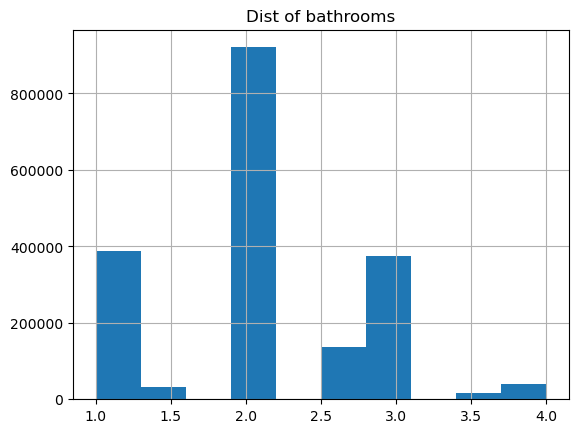

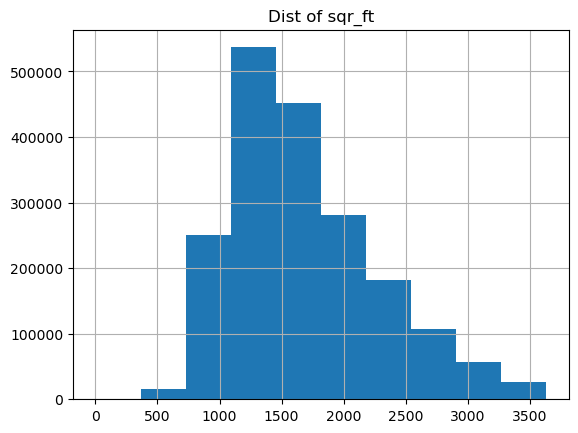

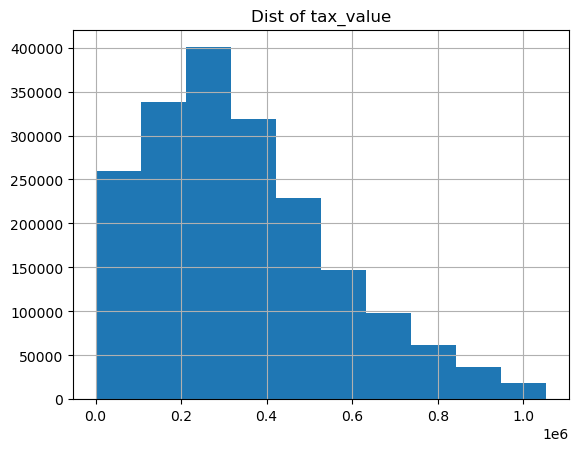

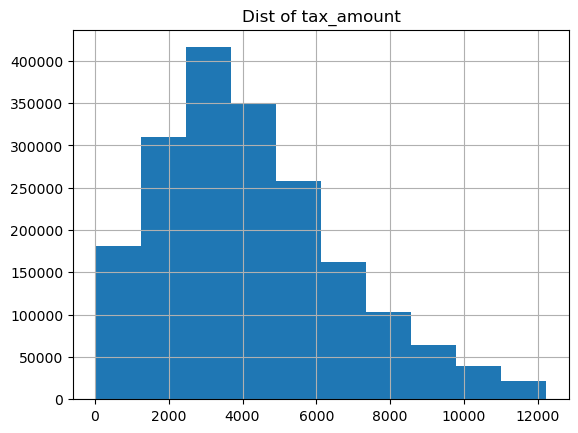

In [45]:
for col in cols:
    df[col].hist()
    plt.title(f'Dist of {col}')
    plt.show()
    print('===========')

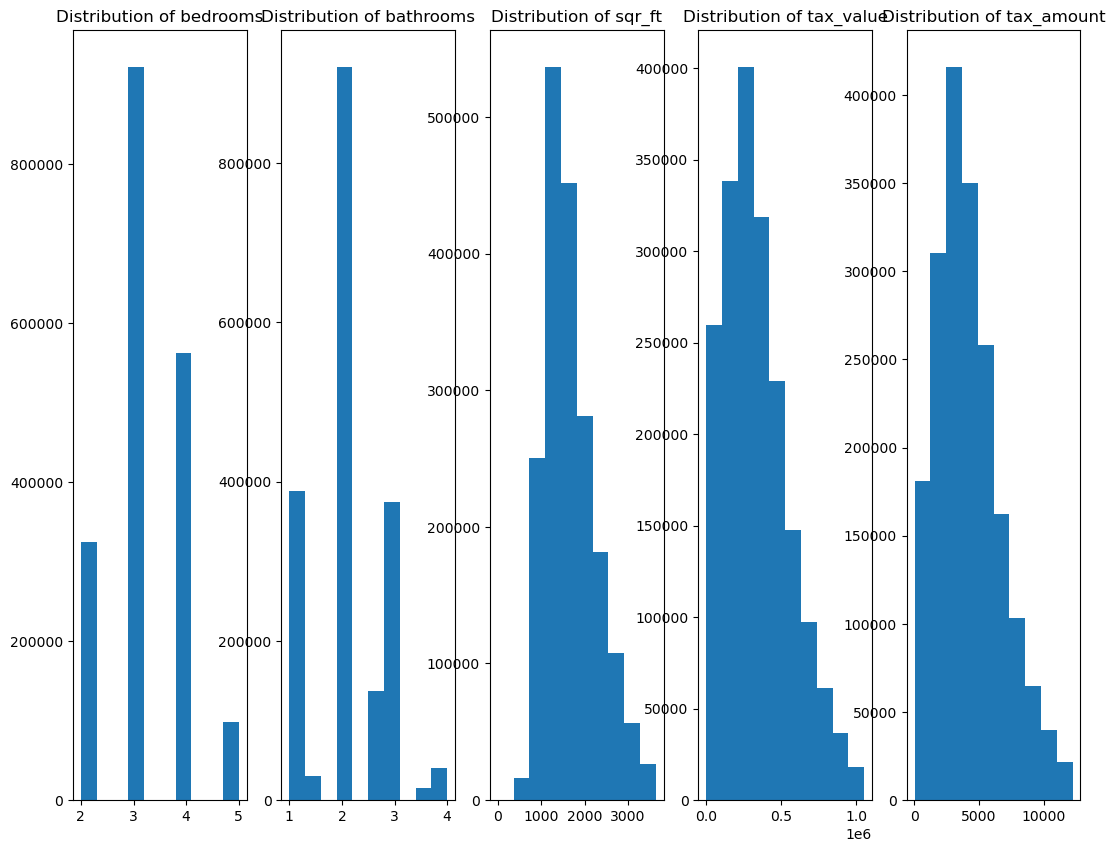

In [46]:
plt.figure(figsize=(13,10))
for i, col in enumerate(cols):
    plot_number = i+1
    plt.subplot(1, len(cols), plot_number)
    plt.title(f'Distribution of {col}')
    df[col].hist(bins=10)
    plt.grid(False)
    plt.ticklabel_format(useOffset=False)
plt.show()

##### Takeaways
    - bedrooms and bathrooms are not normally distributed
    - other fields are skewed but closer to a normal dist.
    - still some outliers, theyre fine

In [56]:
round(df['year_built'].isna().sum() / len(df), 9)

0.00047385

In [48]:
df.isna().sum()

bedrooms        0
bathrooms       0
sqr_ft          0
tax_value       0
year_built    904
tax_amount      0
fips            0
dtype: int64

In [49]:
len(df), df.shape[0]

(1907777, 1907777)

In [58]:
# missing_percent = 0.98
missing_thresh = 0.05
exclude_missing = []
num_rows = df.shape[0]
for c in df.columns:
    num_missing = df[c].isna().sum()
    missing_frac = num_missing / num_rows
    if missing_frac > missing_thresh:
        exclude_missing.append(c)

In [59]:
exclude_missing

[]

In [60]:
df.drop(columns=exclude_missing)

,bedrooms,bathrooms,sqr_ft,tax_value,year_built,tax_amount,fips
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0
6,3.0,4.0,1620.0,847770.0,2011.0,10244.94,6037.0
7,3.0,2.0,2077.0,646760.0,1926.0,7924.68,6037.0
18,3.0,1.0,1244.0,169471.0,1950.0,2532.88,6037.0
19,3.0,2.0,1300.0,233266.0,1950.0,3110.99,6037.0
...,...,...,...,...,...,...,...
2152853,3.0,2.0,1917.0,408680.0,1946.0,4341.32,6111.0
2152854,4.0,2.0,1987.0,259913.0,1955.0,3175.66,6059.0
2152856,3.0,2.5,1809.0,405547.0,2012.0,4181.10,6059.0
2152862,3.0,2.5,1974.0,424353.0,2015.0,5302.70,6059.0


In [61]:
for col in df.columns:
    print(f'Columns: {col}')
    print(df[col].describe())
    print('===================')

Columns: bedrooms
count    1.907777e+06
mean     3.226660e+00
std      7.864515e-01
min      2.000000e+00
25%      3.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: bedrooms, dtype: float64
Columns: bathrooms
count    1.907777e+06
mean     2.075743e+00
std      7.213485e-01
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      2.500000e+00
max      4.000000e+00
Name: bathrooms, dtype: float64
Columns: sqr_ft
count    1.907777e+06
mean     1.680690e+03
std      5.923135e+02
min      1.000000e+00
25%      1.239000e+03
50%      1.562000e+03
75%      2.024000e+03
max      3.634000e+03
Name: sqr_ft, dtype: float64
Columns: tax_value
count    1.907777e+06
mean     3.418999e+05
std      2.155824e+05
min      2.200000e+01
25%      1.775200e+05
50%      3.034080e+05
75%      4.676380e+05
max      1.054000e+06
Name: tax_value, dtype: float64
Columns: year_built
count    1.906873e+06
mean     1.959753e+03
std      2.079616e+01
min      1.801

In [62]:
year_imputer = SimpleImputer()
year_imputer.fit(df[['year_built']])

SimpleImputer()

In [63]:
df['year_built'] = year_imputer.transform(df[['year_built']])

In [64]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1907777 entries, 4 to 2152863
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   bedrooms    1907777 non-null  float64
 1   bathrooms   1907777 non-null  float64
 2   sqr_ft      1907777 non-null  float64
 3   tax_value   1907777 non-null  float64
 4   year_built  1907777 non-null  float64
 5   tax_amount  1907777 non-null  float64
 6   fips        1907777 non-null  float64
dtypes: float64(7)
memory usage: 116.4 MB
